# Predicting Google Stock Price Trends using Recurrent Neural Network

Data Preprocessing

Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
import os

In [3]:
os.chdir('H:\Machine Learning A-Z\Recurrent_Neural_Networks')

Importing Training Dataset

In [4]:
data = pd.read_csv('Google_Stock_Price_Train.csv')
training = data.iloc[:, 1:2].values

Feature Scaling using Normalization

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
sc = MinMaxScaler(feature_range = (0, 1))

In [7]:
training_scaled = sc.fit_transform(training)

In [8]:
X_train = []
y_train = []

In [10]:
for i in range(100, 1258):
    X_train.append(training_scaled[i-100:i, 0])
    y_train.append(training_scaled[i, 0])

In [11]:
X_train, y_train = np.array(X_train), np.array(y_train)

Reshaping the array

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building RNN model

Importing Keras Libraries and packages

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


Initializing the RNN

In [14]:
model = Sequential()

Adding 1st LSTM layer and Dropout Regularisation

In [16]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


Adding 2nd LSTM layer and Dropout Regularisation

In [17]:
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

Adding 3rd LSTM layer and Dropout Regularisation

In [18]:
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

Adding 4th LSTM layer and Dropout Regularisation

In [19]:
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

Adding Final Output layer

In [20]:
model.add(Dense(units = 1))

Compiling the RNN

In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


Fitting model to the training dataset

In [22]:
model.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
1158/1158 [==============================] - 29s 25ms/step - loss: 0.0615
Epoch 2/80
1158/1158 [==============================] - 11s 10ms/step - loss: 0.0063
Epoch 3/80
1158/1158 [==============================] - 12s 10ms/step - loss: 0.0058
Epoch 4/80
1158/1158 [==============================] - 11s 10ms/step - loss: 0.0051
Epoch 5/80
1158/1158 [==============================] - 12s 10ms/step - loss: 0.0053
Epoch 6/80
1158/1158 [==============================] - 12s 11ms/step - loss: 0.0043
Epoch 7/80
1158/1158 [==============================] - 12s 11ms/step - loss: 0.0046
Epoch 8/80
1158/1158 [==============================] - 13s 11ms/step - loss: 0.0043
Epoch 9/80
1158/1158 [==============================] - 14s 12ms/step - loss: 0.0039
Epoch 10/80
1158/1158 [==============================] - 14s 12ms/step - loss: 0.0041
Epoch 11/80
1158/1158 [==============================] - 14s 12ms/step - loss: 0.0039
Epoch 12/80
1158/1158 [==============================] - 15s 13

Making Predictions

Getting test data

In [23]:
test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test.iloc[:, 1:2].values

Getting Predicted Stock Price for Jan 2017

Concatenating Training and Test data

In [24]:
dataset_total = pd.concat((data['Open'], test['Open']), axis = 0)

In [25]:
inputs = dataset_total[len(dataset_total) - len(test) - 100:].values

In [26]:
inputs = inputs.reshape(-1,1)

In [27]:
inputs = sc.transform(inputs)

In [28]:
X_test = []

In [29]:
for i in range(100, 120):
    X_test.append(inputs[i-100:i, 0])

In [30]:
X_test = np.array(X_test)

In [31]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [33]:
predicted_stock_price = model.predict(X_test)

In [34]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualization of Real and Predicted Stock Trends

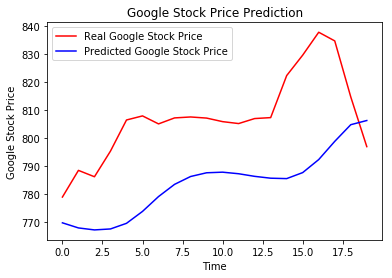

In [35]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
